In [68]:
import numpy as np
import pandas as pd
import astropy
from astropy.table import Table
import shelve
import matplotlib.pyplot as plt

In [2]:
data = {}

In [6]:
bandlist = ['G', 'R', 'I', 'Z']
mags = [24.71, 23.39, 22.188, 21.639, 24.71-.5, 23.39-.5, 22.188-.5, 21.639-.5, 24.71, 23.39, 22.188, 21.639, 24.71-.5, 23.39-.5, 22.188-.5, 21.639-.5, 24.71, 23.39, 22.188, 21.639, 24.71-.5, 23.39-.5, 22.188-.5, 21.639-.5]
mag_errs = [0.27, 0.06, 0.06, 0.06, 0.27, 0.06, 0.06, 0.06, 0.27*2, 0.06*2, 0.06*2, 0.06*2, 0.27*2, 0.06*2, 0.06*2, 0.06*2, 0.27*4, 0.06*4, 0.06*4, 0.06*4, 0.27*4, 0.06*4, 0.06*4, 0.06*4]
print(len(mags), len(mag_errs))
for i in range(4):
    data[f'MAG_AUTO_{bandlist[i]}']=[]
    data[f'MAGERR_AUTO_{bandlist[i]}']=[]
for i in range(24):
    data[f'MAG_AUTO_{bandlist[i%4]}'].append(mags[i])
    data[f'MAGERR_AUTO_{bandlist[i%4]}'].append(mag_errs[i])

24 24


In [8]:
data = pd.DataFrame(data, index=[0, 1, 2, 3, 4, 5])

In [9]:
data['NUMBER']=[0,1,2,3, 4, 5]

In [10]:
data

,MAG_AUTO_G,MAGERR_AUTO_G,MAG_AUTO_R,MAGERR_AUTO_R,MAG_AUTO_I,MAGERR_AUTO_I,MAG_AUTO_Z,MAGERR_AUTO_Z,NUMBER
0,24.71,0.27,23.39,0.06,22.188,0.06,21.639,0.06,0
1,24.21,0.27,22.89,0.06,21.688,0.06,21.139,0.06,1
2,24.71,0.54,23.39,0.12,22.188,0.12,21.639,0.12,2
3,24.21,0.54,22.89,0.12,21.688,0.12,21.139,0.12,3
4,24.71,1.08,23.39,0.24,22.188,0.24,21.639,0.24,4
5,24.21,1.08,22.89,0.24,21.688,0.24,21.139,0.24,5


In [11]:
data.to_hdf('/home/raulteixeira/repos/DESC_BPZ/tests/test_object_0.h5', key='df')

In [12]:
import h5py

In [69]:
filename = '/home/raulteixeira/repos/DESC_BPZ/tests/pzoutMagellan.h5'
with h5py.File(filename) as f:
    bpzres={}
    for key in list(f.keys()):
        bpzres[key] = np.array(f[key])

In [70]:
pd.DataFrame(bpzres, index=[0, 1, 2, 3, 4, 5])

,CHI_SQ,ID,M_0,ODDS,T_B,T_ML,Z_B,Z_B_MAX,Z_B_MIN,Z_MEAN,Z_ML,Z_SAMP,Z_SIG
0,0.801053,0,22.188,0.709692,1.0,1.0,0.735,0.945,0.648731,0.797322,0.745,0.906438,0.106686
1,0.801053,1,21.688,0.758898,1.0,1.0,0.735,0.925,0.648731,0.784678,0.745,0.738624,0.100290
2,0.155080,2,22.188,0.497017,1.0,1.0,0.735,0.965,0.648731,0.818773,0.745,0.973212,0.132604
3,0.155080,3,21.688,0.543400,1.0,1.0,0.735,0.945,0.648731,0.799685,0.745,0.854203,0.127747
4,0.022684,4,22.188,0.380755,1.0,1.0,0.765,0.985,0.615000,0.808323,0.745,0.576254,0.184700
5,0.022684,5,21.688,0.397594,1.0,1.0,0.735,0.955,0.595000,0.777480,0.745,1.153597,0.178071


In [26]:
path = '/home/raulteixeira/repos/DESC_BPZ/tests/probs_outMagellan'
probs = shelve.open(path)

In [11]:
list(probs.keys())

['TIME', 'PARS', '0', '1', '2', '3', '4', '5']

In [20]:
zs = probs['0'][0]

In [31]:
posteriors = probs['0'][2]

In [93]:
[f'posterior {j+1}' for j in range(5)]

['posterior 1', 'posterior 2', 'posterior 3', 'posterior 4', 'posterior 5']

0
i: 0
1
i: 0
2
i: 0
3
i: 0
4
i: 0
5
i: 0


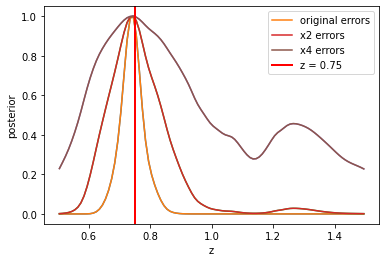

In [108]:
fig, ax = plt.subplots()
plt.xlabel('z')
plt.ylabel('posterior')
plots = []
for j in range(6):
    posteriors = probs[f'{j}'][2]
    print(j)
    for i in range(8):
        if i==0:
            print('i:', i)
            mask = np.logical_and(zs<1.5, 0.5<zs)
            plt1, = ax.plot(zs[mask], posteriors[:,i][mask])
            plots.append(plt1)
l1 = ax.axvline(x = 0.75, lw=2, c='red')
ax.legend(plots[1::2]+[l1], ['original errors', 'x2 errors', 'x4 errors']+['z = 0.75'])
fig.show()

In [15]:
for key in list(probs.keys())[2:]:
    #print(probs[key])

[array([5.000e-03, 1.500e-02, 2.500e-02, 3.500e-02, 4.500e-02, 5.500e-02,
       6.500e-02, 7.500e-02, 8.500e-02, 9.500e-02, 1.050e-01, 1.150e-01,
       1.250e-01, 1.350e-01, 1.450e-01, 1.550e-01, 1.650e-01, 1.750e-01,
       1.850e-01, 1.950e-01, 2.050e-01, 2.150e-01, 2.250e-01, 2.350e-01,
       2.450e-01, 2.550e-01, 2.650e-01, 2.750e-01, 2.850e-01, 2.950e-01,
       3.050e-01, 3.150e-01, 3.250e-01, 3.350e-01, 3.450e-01, 3.550e-01,
       3.650e-01, 3.750e-01, 3.850e-01, 3.950e-01, 4.050e-01, 4.150e-01,
       4.250e-01, 4.350e-01, 4.450e-01, 4.550e-01, 4.650e-01, 4.750e-01,
       4.850e-01, 4.950e-01, 5.050e-01, 5.150e-01, 5.250e-01, 5.350e-01,
       5.450e-01, 5.550e-01, 5.650e-01, 5.750e-01, 5.850e-01, 5.950e-01,
       6.050e-01, 6.150e-01, 6.250e-01, 6.350e-01, 6.450e-01, 6.550e-01,
       6.650e-01, 6.750e-01, 6.850e-01, 6.950e-01, 7.050e-01, 7.150e-01,
       7.250e-01, 7.350e-01, 7.450e-01, 7.550e-01, 7.650e-01, 7.750e-01,
       7.850e-01, 7.950e-01, 8.050e-01, 8.150e-01,